## **06-2 k-평균**

군집(clustering)은 비슷한 데이터끼리 집단을 만드는 방법으로서 각 집단의 평균을 이용하는 k-means 방법이 가장 널리 쓰이는 군집화 알고리즘이다.

### 1) k-평균 알고리즘 소개

k-means 의 절차는 다음과 같다(304쪽 설명도 볼 것).

  1) 군집 수 k를 정한다.

  2) 임의로 k개의 클러스터 중심점(centroid, cluster center)을 정한다.

  3) 각 데이터에서 중심점들까지의 거리를 계산해서 거리가 가장 짧은 중심점의 클러스터에 그 데이터를 포함시킨다.

  4) 각 클러스터에 포함된 점들의 평균을 계산해서 클러스터의 중심점을 바꾼다.

  5) 새로운 중심점들을 가지고 3)- 4)의 절차를 반복하다가 더 이상 변화가 없으면 k-means 군집찾기 끝.

### 2) KMeans 클래스

과일 사진 이미지 데이터로 군집을 연습하자.

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-02-03 12:45:24--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-02-03 12:45:24--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-02-03 12:45:25--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [21]:
import numpy as np

data = np.load('fruits_300.npy')
ndata = data.reshape(-1, 100**2)

In [22]:
ndata.shape

(300, 10000)

즉 `fruits_2d` 데이터는 모두 300개인데 각 데이터는 10,000차원 공간의 점이다.

KMeans는 사이킷런의 cluster 모듈 안에 있다. 가장 중요한 매개변수는 군집의 수 k로서 사용자가 결정해야하는 하이퍼 파라미터다.

아래와 같이 300개의 데이터를 비슷한 것끼리(즉 10,000차원 공간에서 거리가 가까운 것끼리) 모아서 3개의 군집으로 나누어보자. k를 3으로 둔 것은 우리가 과일 종류가 3가지인 것을 알고 있기 때문인데 물론 비지도학습에서는 비현실적인 편법이다. k 선택은 나중에 공부한다.

In [76]:
from sklearn.cluster import KMeans

m=KMeans(n_clusters=3,random_state=0,n_init=10)
m.fit(ndata)

KMeans(n_clusters=3, n_init=10, random_state=0)

`labels_` 속성을 출력하면 300개 데이터가 각각 어떤 군집에 들어갔는지 알아볼 수 있다.

In [77]:
m.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [78]:
np.unique(m.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))

In [79]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')

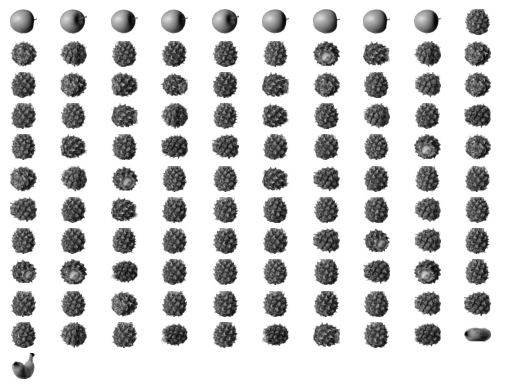

In [80]:
draw_fruits(data[m.labels_==0])

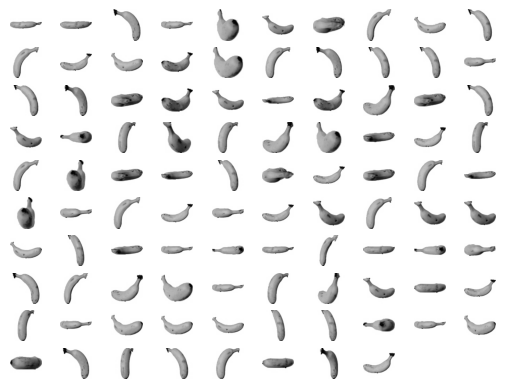

In [81]:
draw_fruits(data[m.labels_==1])

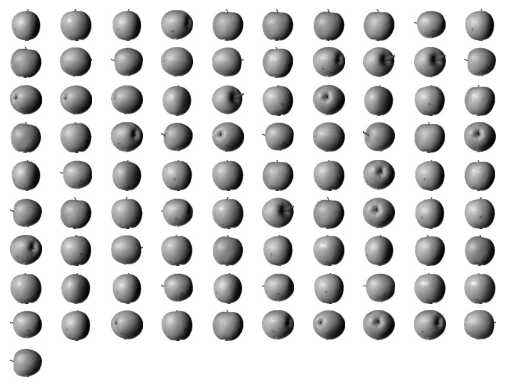

In [82]:
draw_fruits(data[m.labels_==2])

### 3) 클러스터 중심

k개 클러스터의 중심점은 `cluster_centers_` 속성에 들어있다.

In [83]:
m.cluster_centers_.shape

(3, 10000)

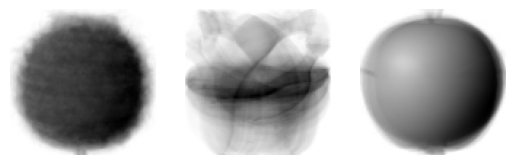

In [86]:
draw_fruits(m.cluster_centers_.reshape(-1,100,100))

300개의 각 데이터는 어떻게 해서 3개 군집 중 하나에 속하게 되었을까? 각 데이터와 3개 중심점까지의 거리를 구해보자. `transform()`을 이용하면 된다.

In [87]:
m.transform(ndata[:10])

array([[4677.10527943, 8642.61845541, 3087.33092099],
       [5363.9344124 , 9030.55531495, 2641.34592861],
       [4637.76848934, 8494.99543011, 3122.48819955],
       [5319.2368841 , 9132.8299753 , 3032.41637343],
       [5039.67898148, 8461.52728232, 2656.96823141],
       [4368.90682127, 7855.57817995, 4874.81067384],
       [4736.52742684, 8558.2291995 , 2749.9702888 ],
       [4664.80383435, 8677.20797817, 2649.95043003],
       [5295.25023036, 8360.33405924, 2736.18767355],
       [5530.95794387, 7956.78993771, 3863.56680225]])

In [89]:
m.predict(ndata[:10])

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2], dtype=int32)

만약 단 하나의 데이터(100번 데이터)에 대해 `transform()`을 적용하고 싶다면 아래와 같이 2차원 배열로 입력해야한다.

In [99]:
m.transform(ndata[100:101])

array([[3393.8136117 , 8837.37750892, 5267.70439881]])

아래와 같이 입력하면 안 된다.

In [93]:
print(m.transform(ndata[100]))

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. ... 1. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [100]:
m.predict(ndata[100:101])

array([0], dtype=int32)

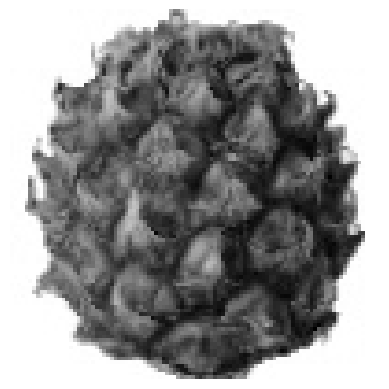

In [101]:
draw_fruits(data[100:101])

반복 계산을 몇 번 했는지 알아보려면

In [103]:
print(m.n_iter_)

6


### 4) 최적의 k 찾기

군집 수 k의 최적값을 찾는 절대적인 방법은 없다. 교재에서 소개하는 엘보우방법을 살펴보자. 이 방법은 군집 중심점과 해당 군집에 속하는 데이터들까지의 거리를 모두 제곱해서 합한 것을 의미하는 `inertia`에 바탕을 둔 방법이다. 일반적으로 k가 증가하면 이너셔 값은 줄어드는데 그 변화 추세를 보고 적절한 k 값(기울기 변화가 생기는 점)을 선택하면 된다.

위에서처럼 k = 3일 때의 이너셔 값은 아래와 같다.

In [104]:
m.inertia_

5074977316.088372

이제 2부터 6까지 k를 바꿔가면서 이너셔를 구한 다음 그림으로 그려보자.

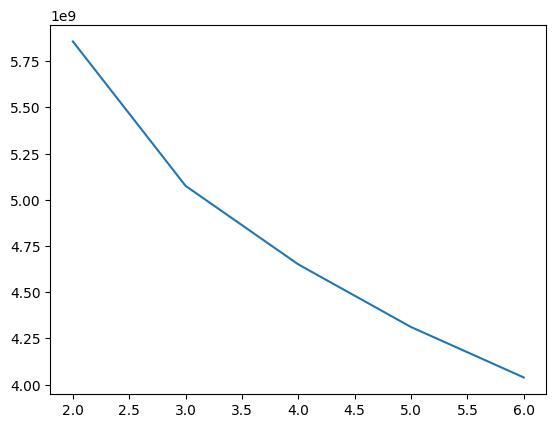

In [111]:
inertia = []

for k in range(2, 7):
    m = KMeans(n_clusters=k, random_state=0, n_init=10)
    m.fit(ndata)
    inertia.append(m.inertia_)

plt.plot(range(2, 7), inertia)